<a href="https://www.kaggle.com/code/carloscll/fast-ai-pokemon-or-digimon?scriptVersionId=170888008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# requerimentos
!pip install --q fastbook

In [2]:
# basico
import fastai


# importações
from fastbook import *
from fastai.vision.widgets import *
from time import sleep


# reprodutibilidade
SEED = 101

In [3]:
np.random.seed(SEED) # seed

def search_images(term, max_images=30):
    '''
    This function searches for images using DuckDuckGo.
    
    term: a string with the title you want to search for e.g 'cats'
    max_images: the number of images to be searched
    '''
    #print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))


searches = 'digimon','pokemon' # terms
path = Path('/kaggle/working/') # save path


'''
This loop searches for and downloads images from different 
categories for each specified search term. 
The categories include "photo", "sun photo", 
and "shade photo". After downloading each image, 
the loop pauses for 10 seconds to avoid overloading the server. 
After downloading all images, 
it resizes all found images to a maximum size of 400 pixels.
'''
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)
    

'''
Looks for corrupted data and 
deletes it.
'''
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


'''
DataBlock: Specifies how the data will be organized and processed.
blocks: Specifies the types of data to be used (images and categories).
get_items: Function to obtain the image files.
splitter: Divides the data into training and validation sets, with 33% of the data for validation.
get_y: Function to obtain the category labels.
item_tfms: Transformations on the images, such as resizing.
'''
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.33, seed=SEED),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)


'''
train model and be happy :)
'''
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 146MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.529421,0.929415,0.418182,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.939432,0.594261,0.309091,00:01
1,0.679817,0.704982,0.290909,00:01
2,0.515635,0.707832,0.290909,00:01


# Display

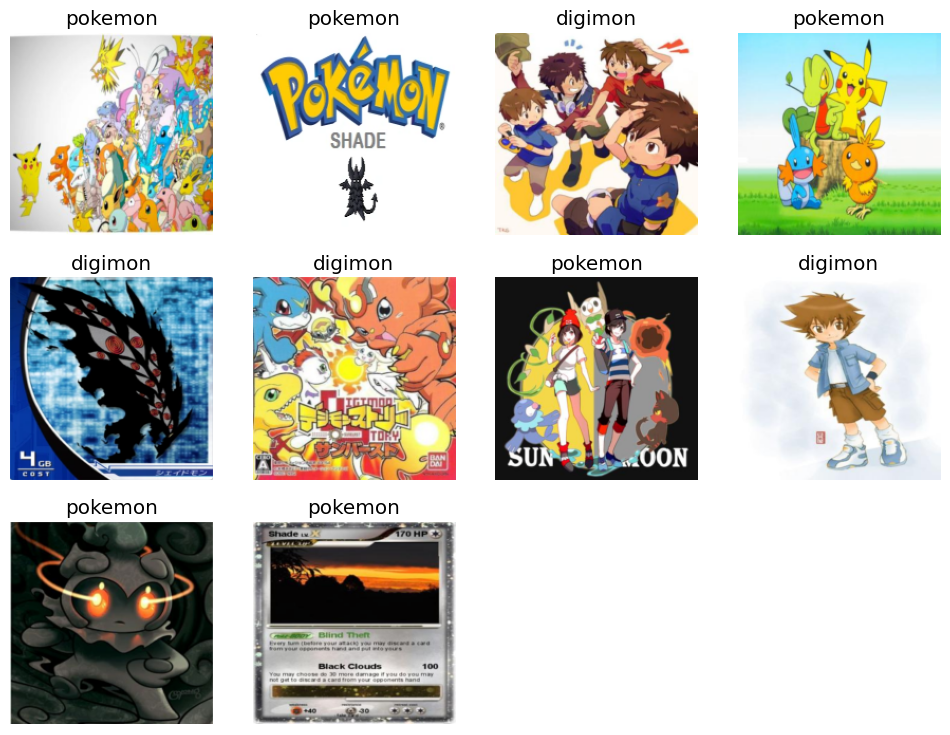

In [4]:
np.random.seed(SEED) 
dls.show_batch(max_n=10);

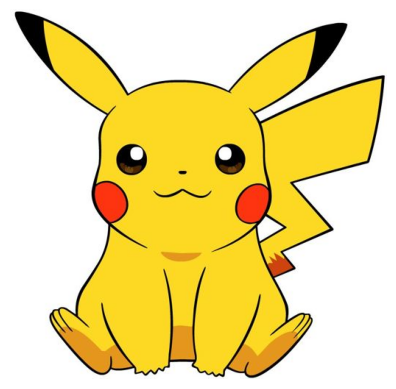

This is: pokemon.
Probability it's Pokemon: 0.9269


In [5]:
is_,_,probs = learn.predict(PILImage.create('/kaggle/input/pikachu-test/7a2cb5fc86df1db37db549422128c66186059808_00.jpg'))

# show image
img = PILImage.create('/kaggle/input/pikachu-test/7a2cb5fc86df1db37db549422128c66186059808_00.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"This is: {is_}.")
print(f"Probability it's Pokemon: {probs[1]:.4f}")